In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = pd.read_csv("train.csv").drop(columns=["SampleID", "label"]) # text, label
y = pd.read_csv("train.csv")["label"] # series

In [14]:
X.describe()

,text
count,56727
unique,56707
top,"In Ballot Selfie Battle, Free Speech Beats Fea..."
freq,2


In [19]:
y.value_counts()

label
POLITICS         28481
WELLNESS         14356
ENTERTAINMENT    13890
Name: count, dtype: int64

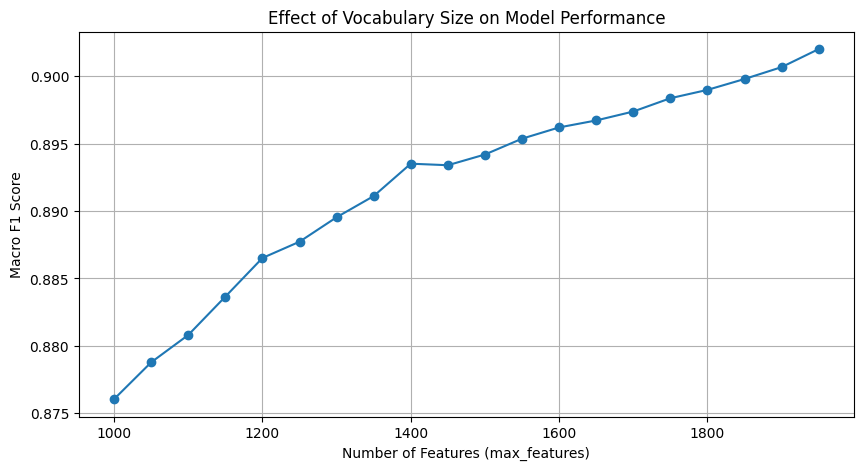

In [ ]:
from sklearn.calibration import LinearSVC
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words="english", max_features=1000, lowercase=True)),
    ('clf', LinearSVC(class_weight="balanced", random_state=42))
])

features = {
    "tfidf__max_features": range(1000, 2000, 50) 
}

gs = GridSearchCV(pipeline, features, scoring="f1_macro")

gs.fit(X["text"], y)
results = pd.DataFrame(gs.cv_results_)

# pd.Series(cross_val_score(pipeline, X["text"], y, cv=10, scoring="f1_macro")).describe()

In [29]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tfidf__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.867021,0.035138,0.144756,0.005144,500,{'tfidf__max_features': 500},0.850873,0.853605,0.859057,0.855355,0.855178,0.854813,0.002662,20
1,0.856994,0.021010,0.143219,0.000990,550,{'tfidf__max_features': 550},0.853957,0.859422,0.863200,0.860996,0.860203,0.859556,0.003070,19
2,0.866580,0.022374,0.141243,0.001862,600,{'tfidf__max_features': 600},0.857923,0.864005,0.867695,0.863552,0.861172,0.862870,0.003237,18
3,0.874990,0.015262,0.143177,0.002053,650,{'tfidf__max_features': 650},0.859069,0.864093,0.870604,0.867871,0.868136,0.865955,0.004023,17
4,0.877980,0.033129,0.150281,0.005814,700,{'tfidf__max_features': 700},0.861802,0.867090,0.873160,0.870604,0.870516,0.868634,0.003924,16
5,0.843015,0.006823,0.139104,0.001286,750,{'tfidf__max_features': 750},0.867266,0.870703,0.874570,0.873601,0.873072,0.871842,0.002619,15
6,0.856181,0.010615,0.142991,0.001837,800,{'tfidf__max_features': 800},0.871232,0.873700,0.878978,0.878713,0.877391,0.876003,0.003039,14
7,0.850156,0.021166,0.145256,0.005941,850,{'tfidf__max_features': 850},0.874053,0.878371,0.882327,0.880212,0.879947,0.878982,0.002768,13
8,0.842481,0.014434,0.141805,0.001623,900,{'tfidf__max_features': 900},0.877754,0.879781,0.884002,0.883297,0.881798,0.881326,0.002298,12
9,0.854820,0.020418,0.142390,0.002379,950,{'tfidf__max_features': 950},0.881985,0.882514,0.888145,0.885059,0.884178,0.884376,0.002186,11


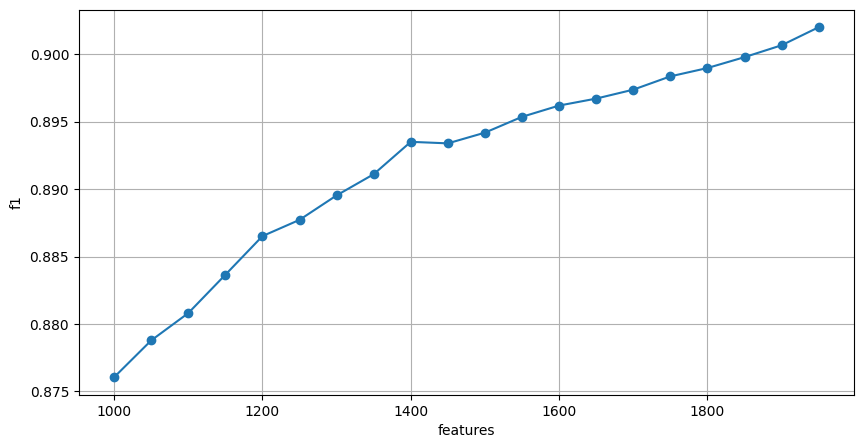

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(results['param_tfidf__max_features'], results['mean_test_score'], marker='o')
plt.xlabel('features')
plt.ylabel('f1')
plt.grid(True)
plt.show()

In [37]:
best = gs.best_estimator_

best.fit(X["text"], y)

submit = pd.read_csv("test.csv")

pd.DataFrame({
    "SampleID": submit["SampleID"],
    "label": best.predict(submit["text"])
}).to_csv("submission.csv")

In [26]:
pipeline.get_params()

{'memory': None,
 'steps': [('tfidf', TfidfVectorizer(max_features=1000, stop_words='english')),
  ('clf', LinearSVC(class_weight='balanced', random_state=42))],
 'transform_input': None,
 'verbose': False,
 'tfidf': TfidfVectorizer(max_features=1000, stop_words='english'),
 'clf': LinearSVC(class_weight='balanced', random_state=42),
 'tfidf__analyzer': 'word',
 'tfidf__binary': False,
 'tfidf__decode_error': 'strict',
 'tfidf__dtype': numpy.float64,
 'tfidf__encoding': 'utf-8',
 'tfidf__input': 'content',
 'tfidf__lowercase': True,
 'tfidf__max_df': 1.0,
 'tfidf__max_features': 1000,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 1),
 'tfidf__norm': 'l2',
 'tfidf__preprocessor': None,
 'tfidf__smooth_idf': True,
 'tfidf__stop_words': 'english',
 'tfidf__strip_accents': None,
 'tfidf__sublinear_tf': False,
 'tfidf__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidf__tokenizer': None,
 'tfidf__use_idf': True,
 'tfidf__vocabulary': None,
 'clf__C': 1.0,
 'clf__class_weight': 'balanced',
 'clf